In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec



In [2]:
train_df = pd.read_csv('Dataset/train.csv', encoding='utf-8')
test_df = pd.read_csv('Dataset/test.csv', encoding='utf-8')

In [5]:
print(train_df.shape)
print(test_df.shape)

(1200000, 21)
(800000, 20)


In [6]:
train_df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [8]:
# Define the target column (Premium Amount)
target = 'Premium Amount'
# Define the categorical and numerical columns
categorical_columns = train_df.select_dtypes(include=['object']).columns
numerical_columns = train_df.select_dtypes(exclude=['object']).columns
print("Categorical Columns: ",categorical_columns.tolist())
print("Numerical Columns: ",numerical_columns.tolist())

Categorical Columns:  ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Policy Start Date', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']
Numerical Columns:  ['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount']


In [10]:
# Check for missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64
id                           0
Age                      12489
Gender                       0
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Education Level              0
Occupation              239125
Health Score             49449
Location                     0
Policy Type               

In [11]:
for col in categorical_columns:
    print(col, train_df[col].nunique())

Gender 2
Marital Status 3
Education Level 4
Occupation 3
Location 3
Policy Type 3
Policy Start Date 167381
Customer Feedback 3
Smoking Status 2
Exercise Frequency 4
Property Type 3


In [12]:
for col in categorical_columns:
    print(col, train_df[col].value_counts())

Gender Gender
Male      602571
Female    597429
Name: count, dtype: int64
Marital Status Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64
Education Level Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64
Occupation Occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64
Location Location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64
Policy Type Policy Type
Premium          401846
Comprehensive    399600
Basic            398554
Name: count, dtype: int64
Policy Start Date Policy Start Date
2020-02-08 15:21:39.134960    142
2023-08-13 15:21:39.155231    137
2022-02-02 15:21:39.134960    137
2022-08-30 15:21:39.134960    134
2023-11-02 15:21:39.134960    118
                             ... 
2021-06-07 15:21:39.104139      1
2024-07-19 15:21:39.233998      1
2019-12-14 15:21

In [16]:
train_df[numerical_columns].describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [15]:
train_df[numerical_columns].mean()

id                      599999.500000
Age                         41.145563
Annual Income            32745.217777
Number of Dependents         2.009934
Health Score                25.613908
Previous Claims              1.002689
Vehicle Age                  9.569889
Credit Score               592.924350
Insurance Duration           5.018219
Premium Amount            1102.544822
dtype: float64

In [17]:
train_df[numerical_columns].std()

id                      346410.305851
Age                         13.539950
Annual Income            32179.506124
Number of Dependents         1.417338
Health Score                12.203462
Previous Claims              0.982840
Vehicle Age                  5.776189
Credit Score               149.981945
Insurance Duration           2.594331
Premium Amount             864.998859
dtype: float64

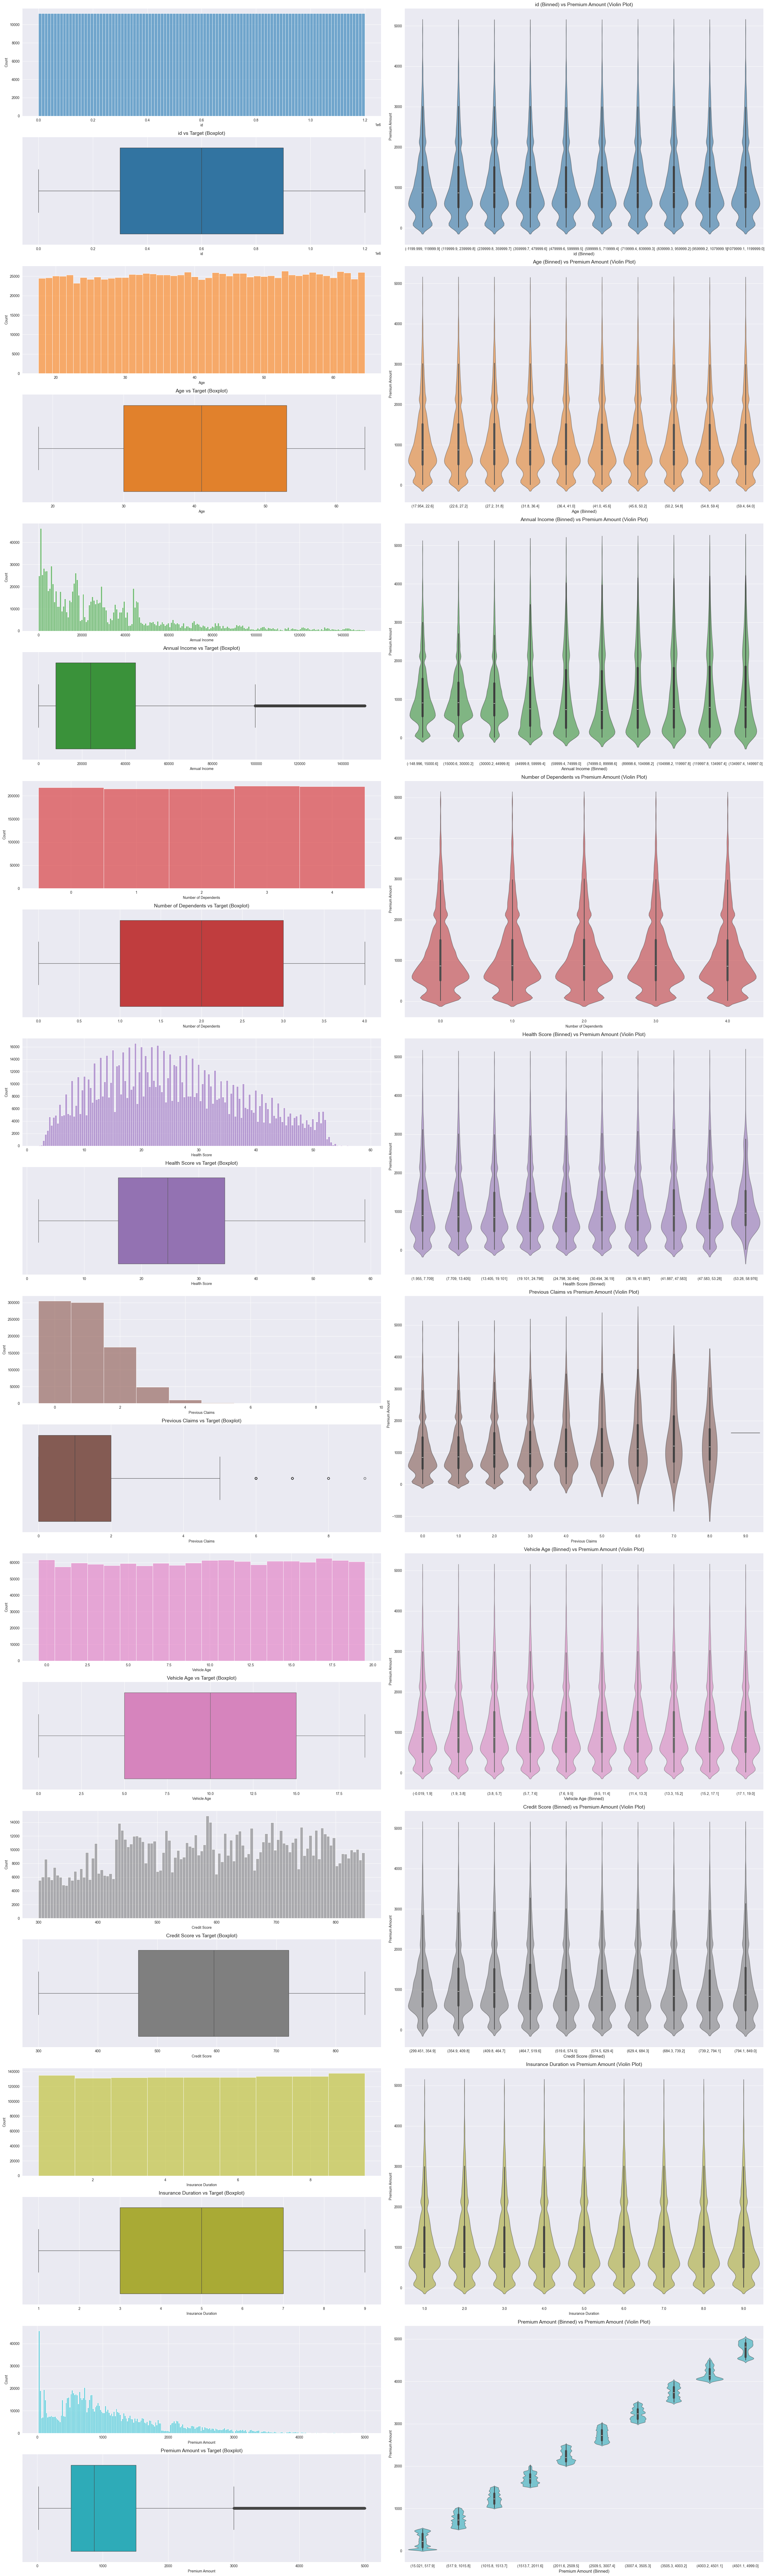

In [21]:
# Create a color palette for the columns
palette = sns.color_palette('tab10', len(numerical_columns))
color_dict = dict(zip(numerical_columns, palette))

# Create a grid of subplots for histograms, boxplots, and scatterplots/violin plots
fig = plt.figure(figsize=(30, 10 * len(numerical_columns)))
gs = gridspec.GridSpec(2 * len(numerical_columns), 2, figure=fig)

df_binned = train_df.copy()

for i, column in enumerate(numerical_columns):

    if train_df[column].nunique() > 50: discrete = False
    else : discrete = True

    # Plot histogram with a unique color
    ax_hist = fig.add_subplot(gs[2 * i, 0])
    sns.histplot(
        data=train_df, x=column, fill=True, common_norm=False, alpha=0.6,
        linewidth=0.8, color=color_dict[column], ax=ax_hist,  discrete = discrete
    )

    # Plot boxplot with the same unique color
    ax_box = fig.add_subplot(gs[2 * i + 1, 0])
    sns.boxplot(data=train_df, x=column, ax=ax_box, color=color_dict[column])
    ax_box.set_title(f'{column} vs Target (Boxplot)', fontsize=14)
    sns.despine(ax=ax_box)

    # Conditional plot: violin plot or barplot based on unique values, fallback to scatterplot
    ax_conditional = fig.add_subplot(gs[2 * i:2 * i + 2, 1])  # Merges 2 rows
    if train_df[column].nunique() <= 10:
        # If the column has 10 or fewer unique values, use a violin plot
        sns.violinplot(data=train_df, x=column, y=target, ax=ax_conditional, color=color_dict[column], alpha=0.6)
        ax_conditional.set_title(f'{column} vs {target} (Violin Plot)', fontsize=14)
    else:
        # Bin the column into 10 intervals, but keep original target column values
        df_binned['Binned Column'] = pd.cut(train_df[column], bins=10)
        sns.violinplot(data=df_binned, x='Binned Column', y=target, ax=ax_conditional, color=color_dict[column], alpha=0.6)
        ax_conditional.set_title(f'{column} (Binned) vs {target} (Violin Plot)', fontsize=14)
        ax_conditional.set_xlabel(f'{column} (Binned)', fontsize=12)

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

C:\Users\Adrian\AppData\Local\Temp\ipykernel_37384\2518227052.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=column, ax=axes[i, 0], palette='tab10')
C:\Users\Adrian\AppData\Local\Temp\ipykernel_37384\2518227052.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x=column, y=target, ax=axes[i, 1], palette='tab10')
C:\Users\Adrian\AppData\Local\Temp\ipykernel_37384\2518227052.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=column, ax=axes[i, 0], palette='tab10')
C:\Users\Adrian\App

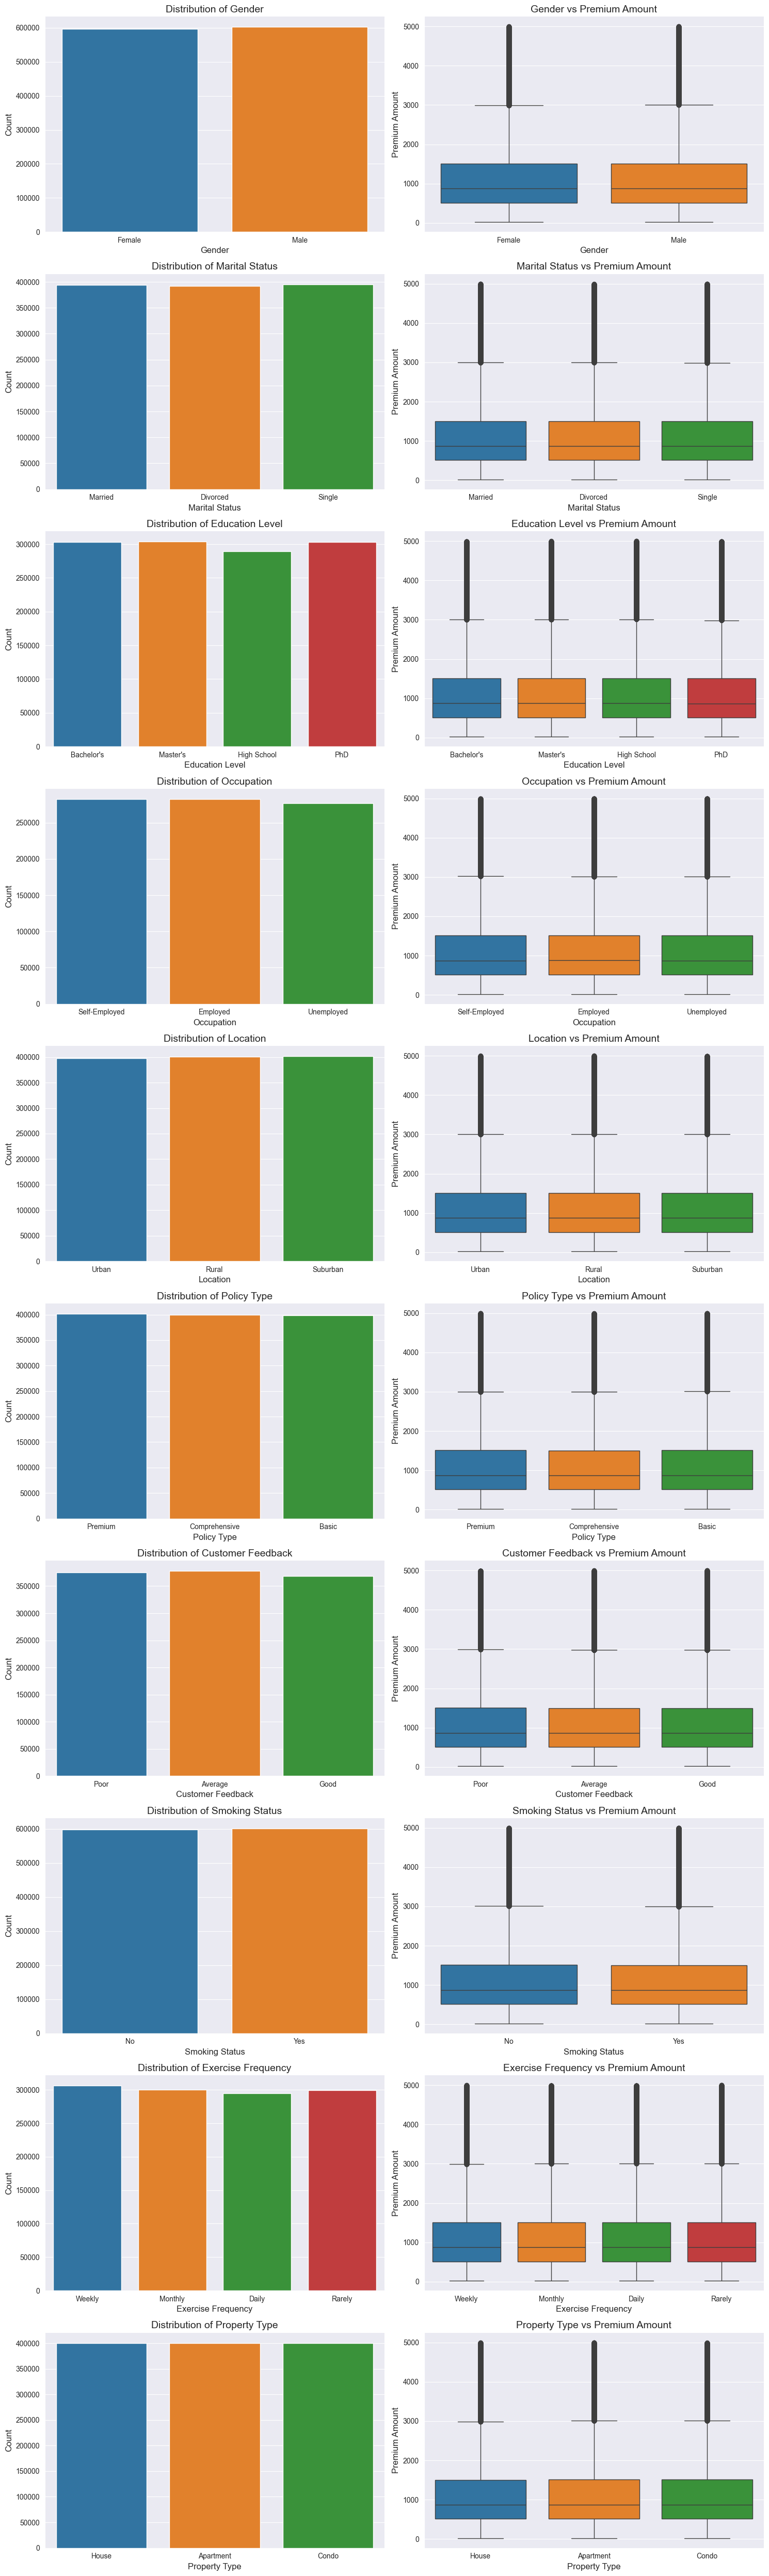

In [23]:
filtered_columns = [col for col in categorical_columns if col != 'Policy Start Date']

# Créer des sous-graphiques pour barplots et boxplots
fig, axes = plt.subplots(len(filtered_columns), 2, figsize=(15, 5 * len(filtered_columns)))

for i, column in enumerate(filtered_columns):
    # Barplot à gauche
    sns.countplot(data=train_df, x=column, ax=axes[i, 0], palette='tab10')
    axes[i, 0].set_title(f'Distribution of {column}', fontsize=14)
    axes[i, 0].set_xlabel(column, fontsize=12)
    axes[i, 0].set_ylabel('Count', fontsize=12)
    sns.despine(ax=axes[i, 0])

    # Boxplot à droite
    sns.boxplot(data=train_df, x=column, y=target, ax=axes[i, 1], palette='tab10')
    axes[i, 1].set_title(f'{column} vs {target}', fontsize=14)
    axes[i, 1].set_xlabel(column, fontsize=12)
    axes[i, 1].set_ylabel(target, fontsize=12)
    sns.despine(ax=axes[i, 1])

plt.tight_layout()  # Ajustement global des sous-graphiques
plt.show()

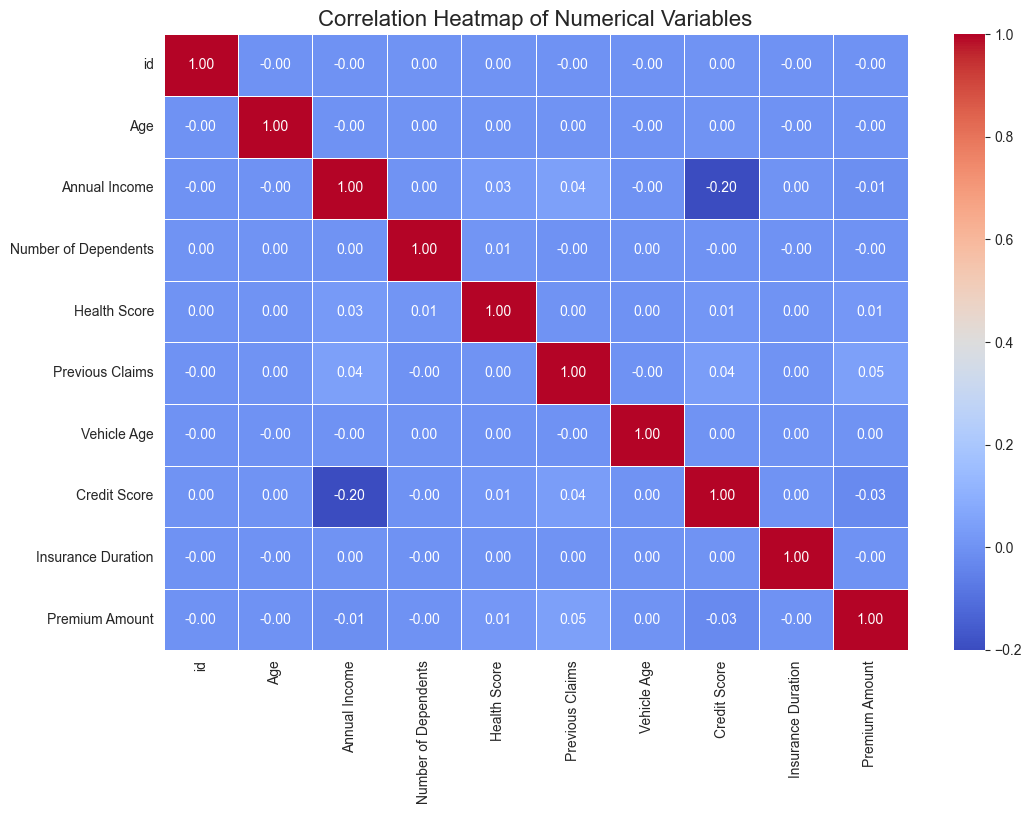

In [24]:
correlation_matrix = train_df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.show()

In [25]:
# Splitting data into features and target
X = train_df.drop(columns=['id', target, 'Policy Start Date'])
y = train_df[target]

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
# Preprocessing pipeline for numerical features
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    #('scaler', StandardScaler())                       # Scale numerical features
])

# Preprocessing pipeline for categorical features
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))                      # Encode categorical features
])

# Combine pipelines into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_columns),
        ('cat', cat_pipeline, categorical_columns)
    ]
)

In [36]:
X.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type'],
      dtype='object')

In [34]:
# Preprocess train and test data
X_processed = preprocessor.fit_transform(X)


ValueError: A given column is not a column of the dataframe

In [33]:
from sklearn.model_selection import train_test_split
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

NameError: name 'X_processed' is not defined